In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import env
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Acquire Zillow Data

Acquire bedroomcnt, bathroomcnt, calculatedfinishsquarefeet, taxvaluedollarcnt, yearbuilt, and fips from Zillow Database 

In [2]:
# Using env file to import user, password and hostname allowing access to SQL database
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/zillow'

# SQL Query will be used to retrieve data from SQL Database 
query = '''
        SELECT bedroomcnt, 
                bathroomcnt, 
                calculatedfinishedsquarefeet, 
                taxvaluedollarcnt, 
                yearbuilt,
                fips 
        FROM properties_2017
        JOIN propertylandusetype USING (propertylandusetypeid)
        JOIN predictions_2017 USING(parcelid)
        WHERE propertylandusedesc IN ("Single Family Residential", 
                                        "Inferred Single Family Residential")
            AND transactiondate LIKE "2017%%";
        '''

## Assign data to a variable then show the variable's head

In [3]:
data = pd.read_sql(query, url)
df =  data.copy()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0


## Rename columns for easier reference

In [4]:
df = df.rename(columns = {'bedroomcnt':'bedrooms',
                          'bathroomcnt':'bathrooms',
                          'calculatedfinishedsquarefeet':'sqft',
                          'taxvaluedollarcnt':'tax_value',
                          'yearbuilt':'year_built'})
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0


## Copy the dataframe into a CSV file for faster access


In [5]:
df.to_csv('zillow.csv', index=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    52441 non-null  float64
 1   bathrooms   52441 non-null  float64
 2   sqft        52359 non-null  float64
 3   tax_value   52440 non-null  float64
 4   year_built  52325 non-null  float64
 5   fips        52441 non-null  float64
dtypes: float64(6)
memory usage: 2.4 MB


## Takeaways:
- Column names can be cleaned up
- 'bedroomcnt' and 'yearbuilt' are always integers 
- 'fips' dtype is not valuable as a float. It would be better to have it as an object  

In [7]:
# create a function for faster access and reproducibility
def get_zillow_data():    
    
    '''This function will acquire data from zillow using env file and rename the columns before saving it as CSV'''

    filename = 'zillow.csv'
    if os.path.exists(filename):
        print('Reading from csv file...')
        return pd.read_csv(filename)
      
    query = '''
        SELECT bedroomcnt, 
                bathroomcnt, 
                calculatedfinishedsquarefeet, 
                taxvaluedollarcnt, 
                yearbuilt,
                fips 
        FROM properties_2017
        JOIN propertylandusetype USING (propertylandusetypeid)
        JOIN predictions_2017 USING(parcelid)
        WHERE propertylandusedesc IN ("Single Family Residential", 
                                        "Inferred Single Family Residential")
            AND transactiondate LIKE "2017%%";
        '''
    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql(query, get_db_url('zillow'))
    print('Saving to csv...')
    
    df = df.rename(columns = {'bedroomcnt':'bedrooms',
                          'bathroomcnt':'bathrooms',
                          'calculatedfinishedsquarefeet':'sqft',
                          'taxvaluedollarcnt':'tax_value',
                          'yearbuilt':'year_built'})
    df.to_csv(filename, index=False)
    return df

# Wrangle Zillow Data

Check the information of the dataframe by running:
- df.head() to check what is 
- df.info() to look at the counts and dtypes
- df.isnull() to check for nulls
- df.describe() to see all the stats

In [8]:
df = get_zillow_data()

Reading from csv file...


In [9]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0


In [10]:
df.isnull().sum()

bedrooms        0
bathrooms       0
sqft           82
tax_value       1
year_built    116
fips            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    52441 non-null  float64
 1   bathrooms   52441 non-null  float64
 2   sqft        52359 non-null  float64
 3   tax_value   52440 non-null  float64
 4   year_built  52325 non-null  float64
 5   fips        52441 non-null  float64
dtypes: float64(6)
memory usage: 2.4 MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,52441.0,3.300681,0.949094,0.0,3.0,3.0,4.00,14.0
bathrooms,52441.0,2.299403,1.022772,0.0,2.0,2.0,3.00,18.0
sqft,52359.0,1922.890754,1004.365838,128.0,1268.0,1659.0,2306.00,21929.0
tax_value,52440.0,529688.163921,751894.553363,1000.0,193747.5,373612.0,619301.25,49061236.0
year_built,52325.0,1963.393884,23.133571,1878.0,1950.0,1961.0,1979.00,2016.0
fips,52441.0,6049.132149,21.029067,6037.0,6037.0,6037.0,6059.00,6111.0


## Visualize data

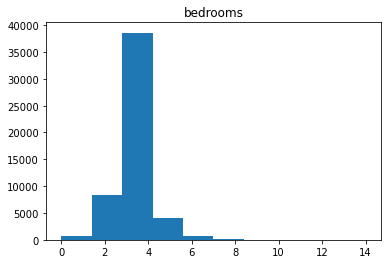

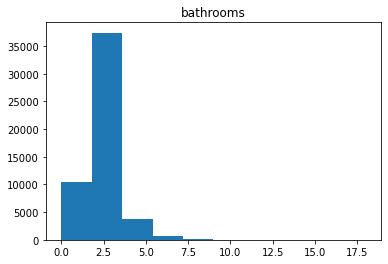

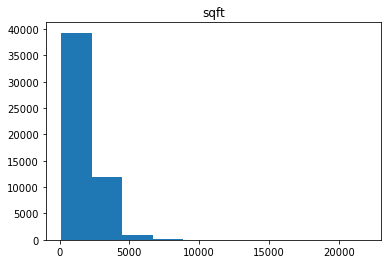

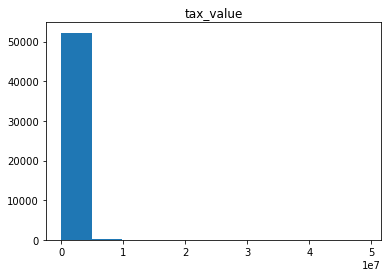

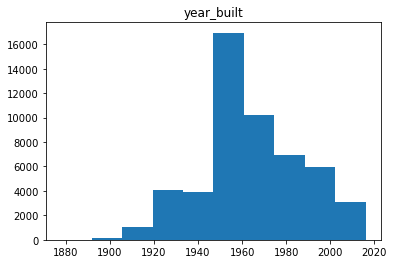

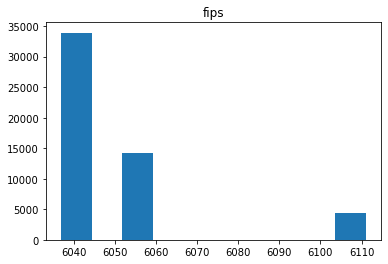

In [13]:

# List of columns
cols = df.columns


for col in cols:
   
    # Title with columns name.
    plt.title(col)
    # histogram of each column 
    plt.hist(df[col])
    plt.show()

## Get the value counts per column

In [14]:
# get value counts and decide on data types
for col in cols:
    
    print(col)
    print(df[col].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()


bedrooms
3.0     23359
4.0     15240
2.0      8340
5.0      3973
6.0       635
1.0       612
0.0       137
7.0       106
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

bathrooms
2.0     21893
3.0     10673
1.0      9568
2.5      3934
4.0      2227
3.5       918
1.5       841
5.0       803
4.5       687
6.0       322
5.5       224
0.0       121
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: bathrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

sqft
1120.0    128
1200.0    119
1080.0    102
1040.0     86
936.0      86
         ... 
7088.0      1
604.0       1
5422.0      1
534.0       1
5655.0      1
Name: sqft, Length: 4723, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

tax_value
455000.0    34
600000.0    30
500000.0    24
450000.0    24
550000.0    24
            ..
209341

## Takeaways
- Large number of outliers make the charts look skewed
- FIPS can be found on: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013697
- Change FIPS to county name for easier reference: 
    - 06037 = Los Angeles County
    - 06059 = Orange County
    - 06111 = Ventura County

## Remove outliers

Using function from Wrangle exercise we can remove the outliers. In this function we will identify numbers that are outside the IQR or midspread and remove them. 
This will allow is to concentrate on the numbers that are the most quan

In [15]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    # Create a column that will label our rows as containing an outlier value or not
    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # update the outlier label any time that the value is outside of boundaries
        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df.drop(columns=['outlier'], inplace=True)
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [16]:
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'sqft', 'tax_value'])

Number of observations removed: 5670


In [17]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46771 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    46771 non-null  float64
 1   bathrooms   46771 non-null  float64
 2   sqft        46767 non-null  float64
 3   tax_value   46770 non-null  float64
 4   year_built  46741 non-null  float64
 5   fips        46771 non-null  float64
dtypes: float64(6)
memory usage: 2.5 MB


Min and Max are smaller so we can try visualization again

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,46771.0,3.229544,0.798486,2.0,3.0,3.0,4.00,5.0
bathrooms,46771.0,2.135330,0.757525,1.0,2.0,2.0,3.00,4.5
sqft,46767.0,1738.369513,650.795133,152.0,1248.0,1593.0,2111.00,3863.0
tax_value,46770.0,388250.607783,263242.063024,1000.0,178569.0,344151.5,539005.25,1256879.0
year_built,46741.0,1962.540874,22.071375,1878.0,1950.0,1960.0,1977.00,2016.0
fips,46771.0,6049.258151,21.246155,6037.0,6037.0,6037.0,6059.00,6111.0


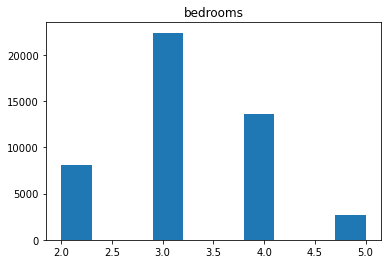

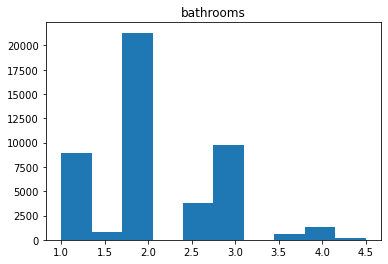

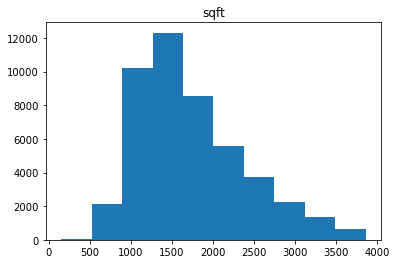

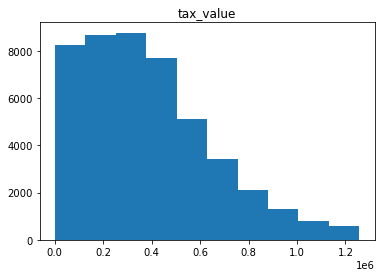

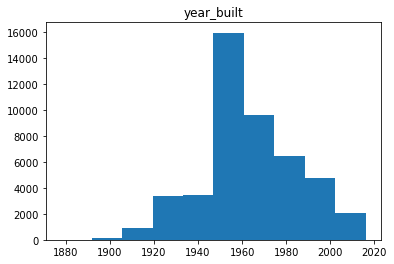

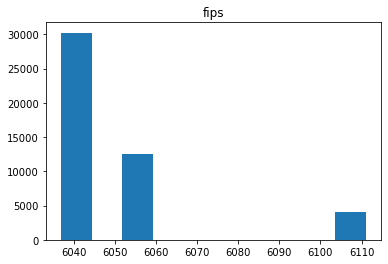

In [20]:

# List of columns
cols = df.columns


for col in cols:
   
    # Title with columns name.
    plt.title(col)
    # histogram of each column 
    plt.hist(df[col])
    plt.show()

In [21]:
# get value counts and decide on data types
for col in cols:
    
    print(col)
    print(df[col].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

bedrooms
3.0    22398
4.0    13599
2.0     8137
5.0     2637
Name: bedrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

bathrooms
2.0    21315
3.0     9733
1.0     8936
2.5     3831
4.0     1298
1.5      835
3.5      619
4.5      204
Name: bathrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

sqft
1120.0    127
1200.0    116
1080.0    100
936.0      86
1040.0     84
         ... 
3369.0      1
3737.0      1
3494.0      1
3405.0      1
512.0       1
Name: sqft, Length: 3146, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

tax_value
455000.0    34
600000.0    30
500000.0    24
450000.0    23
550000.0    23
            ..
519222.0     1
477330.0     1
977685.0     1
348301.0     1
49546.0      1
Name: tax_value, Length: 34274, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

year_built
1955.0    1831
1950.0    1516
1954.0    1457
1953.0    1413
1956.0    1321
          ... 
1897.0       1
1878.0       1
1882.0       1
1894.0       1
1880.0       1
Name: year_built, Le

## Drop duplicates  


In [22]:
df = df.drop_duplicates()
df.shape

(46596, 6)

## Drop null values


In [23]:
df = df.dropna()
df.shape

(46565, 6)

## Change ds type for fips, yearbuilt and bedrooms.


In [24]:
df.fips = df.fips.astype(object)
df.year_built = df.year_built.astype(int)
df.bedrooms = df.bedrooms.astype(int)

## Review changes

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46565 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    46565 non-null  int64  
 1   bathrooms   46565 non-null  float64
 2   sqft        46565 non-null  float64
 3   tax_value   46565 non-null  float64
 4   year_built  46565 non-null  int64  
 5   fips        46565 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ MB


## Change FIPS to county name for easier reference: 
    - 6037 = Los Angeles County
    - 6059 = Orange County
    - 6111 = Ventura County

In [26]:
df = df.rename(columns={'fips':'county'})
df = df.replace({'county':{6111:'Ventura', 6059:'Orange', 6037:'Los_Angeles'}})
df.head()


,bedrooms,bathrooms,sqft,tax_value,year_built,county
0,4,3.5,3100.0,1023282.0,1998,Orange
1,2,1.0,1465.0,464000.0,1967,Ventura
2,3,2.0,1243.0,564778.0,1962,Orange
3,4,3.0,2376.0,145143.0,1970,Los_Angeles
4,4,3.0,2962.0,773303.0,1950,Los_Angeles


## Function to clean Zillow data


In [27]:
def clean_zillow_data(df):
    
    '''This function will clean Zillow data'''

    # drop duplicates
    df = df.drop_duplicates()
    
    # drop null values
    df = df.dropna()
    
    # change types
    df[['bedrooms', 'year_built']] = df[['bedrooms', 'year_built']].astype(int)
    df.fips = df.fips.astype(object)

    # rename fips column 
    df = df.rename(columns={'fips':'county'})
    
    # replace values for county names
    df = df.replace({'county':{6111:'Ventura', 6059:'Orange', 6037:'Los_Angeles'}})
    
    return df

In [29]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,county
0,4,3.5,3100.0,1023282.0,1998,Orange
1,2,1.0,1465.0,464000.0,1967,Ventura
2,3,2.0,1243.0,564778.0,1962,Orange
3,4,3.0,2376.0,145143.0,1970,Los_Angeles
4,4,3.0,2962.0,773303.0,1950,Los_Angeles


# Split data

In [30]:
train_validate, test = train_test_split(df, test_size=.2, random_state=177)
train, validate = train_test_split(train_validate, test_size=.3, random_state=177)
train.shape, test.shape, validate.shape

((26076, 6), (9313, 6), (11176, 6))

In [31]:
def split_zillow_data(df):

    ''' this function will take your raw data frame, clean it and split it'''
    
    # cleans data using function
    df = clean_zillow_data(df)
    
    # split the data
    train_validate, test = train_test_split(df, test_size=.2, random_state=177)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=177)
    
    # show the split
    print(f'Dataframe has been split: ')
    print(f'Train: {train.shape}')
    print(f'Validate: {validate.shape}')
    print(f'Test: {test.shape}')
    
    # return train validate and test
    return train, validate, test